# Logistic Regression

## Overview

**Logistic Regression** is a statistical method used to model binary (two-class) outcomes. It is a type of regression analysis where the dependent variable is categorical. Instead of predicting continuous values, logistic regression predicts the probability that a given input belongs to a certain class.

### Key Concepts:
- **Binary Outcomes**: Logistic regression deals with binary outcomes like yes/no, true/false, or 0/1.
- **Logistic Function (Sigmoid Function)**: The logistic function maps any real-valued number to a value between 0 and 1. This makes it useful for probability estimation.

The logistic function is defined as:

\[
f(x) = \frac{1}{1 + e^{-z}}
\]

Where:
- \( z = w^T x + b \) (the linear combination of weights and input features)
- \( w \) are the weights (coefficients) of the features
- \( b \) is the bias term

## Logistic Regression Model

Logistic regression estimates probabilities using the logistic function. The output is interpreted as the probability of the input belonging to a certain class.

### Hypothesis:

\[
h_{\theta}(x) = \frac{1}{1 + e^{-(\theta^T x)}}
\]

Where:
- \( h_{\theta}(x) \) is the predicted probability
- \( \theta \) represents the weights of the features
- \( x \) represents the input features

### Decision Boundary:
The decision boundary is determined by the threshold applied to the predicted probability. For binary classification:
- If \( P(y=1|x) \geq 0.5 \), predict class 1.
- If \( P(y=1|x) < 0.5 \), predict class 0.

## Cost Function

Logistic regression uses a cost function that is based on the concept of maximum likelihood estimation (MLE). The cost function for logistic regression is called the **log-loss** or **binary cross-entropy**.

\[
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]
\]

Where:
- \( m \) is the number of training examples
- \( y^{(i)} \) is the actual label of the \(i\)-th example
- \( h_{\theta}(x^{(i)}) \) is the predicted probability for the \(i\)-th example

## Gradient Descent

To minimize the cost function, we use **gradient descent**, which iteratively updates the weights \( \theta \) as follows:

\[
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)
\]

Where:
- \( \alpha \) is the learning rate
- \( \frac{\partial}{\partial \theta_j} J(\theta) \) is the gradient of the cost function with respect to \( \theta_j \).

## Evaluation Metrics

For binary classification, common evaluation metrics include:
1. **Accuracy**: The ratio of correctly predicted instances to total instances.
2. **Precision**: The ratio of true positives to the sum of true positives and false positives.
3. **Recall**: The ratio of true positives to the sum of true positives and false negatives.
4. **F1 Score**: The harmonic mean of precision and recall.
5. **ROC Curve & AUC**: A graphical representation of the performance of a binary classifier.

## Assumptions of Logistic Regression

1. **Linear Relationship between Log-Odds and Features**: Logistic regression assumes a linear relationship between the log-odds of the outcome and the predictor variables.
2. **Independence of Errors**: The errors are independent of each other.
3. **No Multicollinearity**: The model assumes that there is little or no multicollinearity among the predictor variables.
4. **Large Sample Size**: Logistic regression requires a relatively large sample size to achieve reliable results.

## Python Implementation Example

Here’s a simple implementation using `scikit-learn`:

```python
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
# For example, using the Iris dataset for binary classification
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]  # Only using two features for simplicity
y = (iris.target != 0) * 1  # Convert to binary classification (not class 0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [72]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Machine-Learning/refs/heads/main/Logistic%20Regression/Client.csv" ,index_col=0)


In [73]:
df.describe()


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.511194,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,1.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [74]:
df.drop(columns=['CASENUM'], inplace=True)


In [75]:
df.isna().sum()


ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [76]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')  

df.iloc[:,1:4]



,CLMSEX,CLMINSUR,SEATBELT
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
1335,0.0,1.0,0.0
1336,1.0,1.0,0.0
1337,1.0,1.0,0.0
1338,1.0,0.0,0.0


In [77]:
si.fit_transform(df.iloc[:,1:4])


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 1., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

In [78]:
df.iloc[:,1:4] = si.fit_transform(df.iloc[:,1:4])


In [79]:
df.isna().sum()


ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [80]:
df.CLMAGE.fillna(df.CLMAGE.mode()[0] , inplace= True)


C:\Users\Yogesh\AppData\Local\Temp\ipykernel_10604\2290592660.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.CLMAGE.fillna(df.CLMAGE.mode()[0] , inplace= True)


In [81]:
df.isna().sum()


ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# Model Building



In [82]:
#define X And Y Variable

x= df.iloc[:,1:]
y = df["ATTORNEY"]


In [83]:
x


,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,10.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [84]:
y


0       1
1       0
2       0
3       1
4       0
       ..
1335    0
1336    1
1337    0
1338    1
1339    0
Name: ATTORNEY, Length: 1340, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [86]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


In [87]:
LR.fit(X_train,y_train)


LogisticRegression()

In [88]:
ypred = LR.predict(X_test)


In [89]:
ypred


array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0], dtype=int64)

# Evaluation Matric 

In [104]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

def create_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm

def print_confusion_matrix(cm):
    tp, fp, fn, tn = cm.ravel()
    print("Confusion Matrix:")
    print("  Predicted Positive  Predicted Negative")
    print(f"Actual Positive    {tp}             {fp}")
    print(f"Actual Negative    {fn}             {tn}")
    print("\nAccuracy:", (tp + tn) / (tp + tn + fp + fn))
    print("Precision:", tp / (tp + fp))
    print("Recall:", tp / (tp + fn))
    print("F1 Score:", 2 * tp / (2 * tp + fp + fn))

# Example usage

cm = create_confusion_matrix(y_test,ypred)
print_confusion_matrix(cm)


Confusion Matrix:
  Predicted Positive  Predicted Negative
Actual Positive    113             27
Actual Negative    43             85

Accuracy: 0.7388059701492538
Precision: 0.8071428571428572
Recall: 0.7243589743589743
F1 Score: 0.7635135135135135


In [106]:
print(classification_report(ypred,y_test))


              precision    recall  f1-score   support

           0       0.81      0.72      0.76       156
           1       0.66      0.76      0.71       112

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.74      0.74       268



<Axes: >

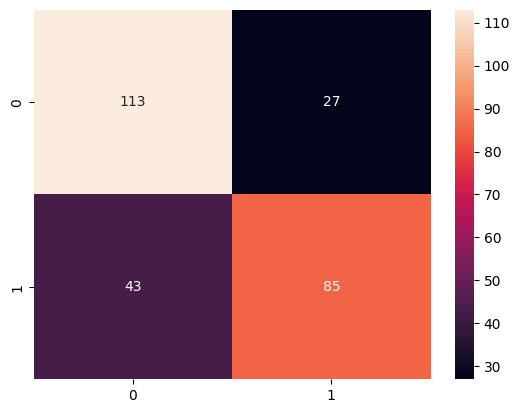

In [107]:
sns.heatmap(confusion_matrix(y_test,ypred) , annot=True , fmt= "g")
